#### 1. Import Library ที่จำเป็น

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


#### 2.Load DataSet ot pandas

In [2]:
df = pd.read_excel(r'datasets/fruit_data.xlsx')

print(df.head())
print(df.tail())


   width  height  mass  color_score fruit_name
0    8.4     7.3   192         0.55      apple
1    6.2     4.7    86         0.80   mandarin
2    6.0     4.6    84         0.79   mandarin
3    8.0     6.8   180         0.59      apple
4    7.4     7.2   176         0.60      apple
    width  height  mass  color_score fruit_name
54    6.5     8.5   152         0.72      lemon
55    6.1     8.1   118         0.70      lemon
56    7.6     8.2   180         0.79     orange
57    7.2     7.2   154         0.82     orange
58    7.2    10.3   194         0.70      lemon


#### 3.Choos Feature and Target

In [3]:
x = df[['width','height','mass','color_score']]  # Feature
y = df['fruit_name'] # Target
print(x.head())
print(y.tail())


   width  height  mass  color_score
0    8.4     7.3   192         0.55
1    6.2     4.7    86         0.80
2    6.0     4.6    84         0.79
3    8.0     6.8   180         0.59
4    7.4     7.2   176         0.60
54     lemon
55     lemon
56    orange
57    orange
58     lemon
Name: fruit_name, dtype: object


#### 4.Split DataSet for Train and Test

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

print(x_train.shape)
print(x_test.shape)


(44, 4)
(15, 4)


#### 5.Scaling

In [5]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(x_train[:5])
print(x_test[:5])


[[ 0.15191331  1.17500985  0.49402838 -0.54959973]
 [-1.33346127 -0.0950875  -0.83837741 -0.54959973]
 [-1.5810237  -2.70999381 -1.59975214  0.66627453]
 [ 0.64703817 -0.24451072 -0.15314015 -0.95489115]
 [ 0.15191331 -0.46864555  0.07527227  0.53117739]]
[[ 3.12266247  1.17500985  3.84407721 -0.27940545]
 [ 0.02813209  0.20375893 -0.19120888 -0.14430831]
 [ 0.27569452  1.92212593  1.06505943 -0.68469687]
 [-0.46699277 -0.39393394 -0.38155257 -0.54959973]
 [ 0.02813209 -0.02037589  0.22754722  2.15234308]]


#### 6. Set K value and Create KNeighborsClassifier Object

In [29]:
k = 3
model = KNeighborsClassifier(n_neighbors=k)


#### 7.Train Model

In [30]:
model.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

#### 8.Prediction

In [31]:
x_pred = [[7.5, 7.5, 175, 0.75]]
x_pred_sc = scaler.transform(x_pred)
y_pred = model.predict(x_pred_sc)

w = x_pred[0][0]
h = x_pred[0][1]
m = x_pred[0][2]
c = x_pred[0][3]
f = y_pred[0]

print('K = ', k)
print('Prediction:')
print(f'width: {w}, height: {h}, mass: {m},  color_score: {c} => fruit: {f}')


K =  3
Prediction:
width: 7.5, height: 7.5, mass: 175,  color_score: 0.75 => fruit: orange


/Users/samit/Downloads/PythonMLCPF_CodeLab/KNNModelLab/env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### 9.Model Evaluation

In [32]:
# การแสดงค่า score
print('Accuracy: ', '{:.2f}'.format(model.score(x_test, y_test)))


Accuracy:  0.93


#### 10.Optimal K

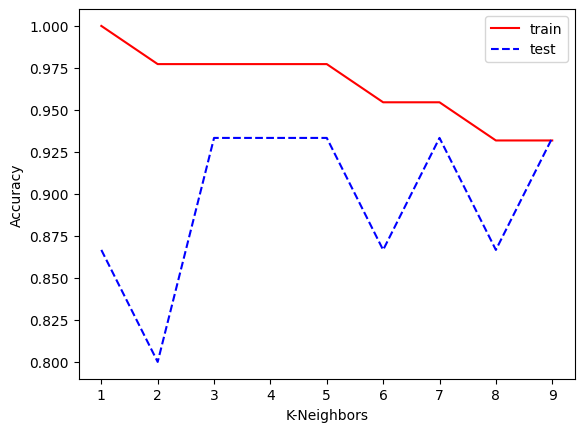

In [28]:
acc_train = []
acc_test = []
n_neighbors = range(1, 10) # ลองกำหนดช่วงค่า K ตั้งแต่ 1 - 10

for k in n_neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    acc_train.append(model.score(x_train, y_train))
    acc_test.append(model.score(x_test, y_test))

# Plot graph train and test
plt.plot(n_neighbors, acc_train, 'r-', label='train')
plt.plot(n_neighbors, acc_test, 'b--', label='test')
plt.xlabel('K-Neighbors')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()
